# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** M Fajrin Wirattama
- **Email:** fajrinwirattama21@gmail.com
- **ID Dicoding:** wirattama

## Menentukan Pertanyaan Bisnis

- Apakah terdapat tren penurunan atau peningkatan PM2.5 DAN PM10 dalam beberapa tahun terakhir?

- Apakah terdapat tren penurunan atau peningkatan CO DAN NO2 dalam beberapa tahun terakhir pada station Aotizhongxin dan Changping?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, zipfile

## Data Wrangling

### Gathering Data

In [2]:
Aotizhongxin = pd.read_csv("Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
print(Aotizhongxin)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0   

In [3]:
Changping = pd.read_csv("Data/PRSA_Data_Changping_20130301-20170228.csv")
print(Changping)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      

In [28]:
data = ["year", "PM2.5", "PM10", "NO2", "CO", "station"]
df1 = Aotizhongxin[data]
df2 = Changping[data]
merged_data = pd.concat([df1, df2], ignore_index=True)
merged_data.to_csv("merged_data.csv", index=False)
print(merged_data.head())

   year  PM2.5  PM10   NO2     CO       station
0  2013    4.0   4.0   7.0  300.0  Aotizhongxin
1  2013    8.0   8.0   7.0  300.0  Aotizhongxin
2  2013    7.0   7.0  10.0  300.0  Aotizhongxin
3  2013    6.0   6.0  11.0  300.0  Aotizhongxin
4  2013    3.0   3.0  12.0  300.0  Aotizhongxin


### Assessing Data

In [29]:
Aotizhongxin.info()
Changping.info()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

### Cleaning Data

In [30]:
merged_data.isnull().sum()

year          0
PM2.5      1699
PM10       1300
NO2        1690
CO         3297
station       0
dtype: int64

In [32]:
mdc = merged_data.dropna()

In [33]:
mdc.isnull().sum()

year       0
PM2.5      0
PM10       0
NO2        0
CO         0
station    0
dtype: int64

**Insight:**
- xxx
- xxx

In [37]:
mdc.duplicated().sum()

943

In [38]:
mdc_clean = mdc.drop_duplicates()

In [39]:
mdc_clean.duplicated().sum()

0

In [40]:
mdc_clean.describe()

,year,PM2.5,PM10,NO2,CO
count,64863.000000,64863.000000,64863.000000,64863.000000,64863.000000
mean,2014.709588,76.800712,102.482970,52.069028,1216.304719
std,1.168608,76.166615,88.659515,34.354865,1170.977494
min,2013.000000,3.000000,2.000000,2.000000,100.000000
25%,2014.000000,20.000000,36.000000,25.000000,500.000000
50%,2015.000000,53.000000,79.000000,44.000000,800.000000
75%,2016.000000,107.000000,143.000000,72.000000,1500.000000
max,2017.000000,713.000000,992.000000,290.000000,10000.000000


## Exploratory Data Analysis (EDA)

In [41]:
mdc_clean.describe(include="all")

,year,PM2.5,PM10,NO2,CO,station
count,64863.000000,64863.000000,64863.000000,64863.000000,64863.000000,64863
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,32555
mean,2014.709588,76.800712,102.482970,52.069028,1216.304719,NaN
std,1.168608,76.166615,88.659515,34.354865,1170.977494,NaN
min,2013.000000,3.000000,2.000000,2.000000,100.000000,NaN
25%,2014.000000,20.000000,36.000000,25.000000,500.000000,NaN
50%,2015.000000,53.000000,79.000000,44.000000,800.000000,NaN
75%,2016.000000,107.000000,143.000000,72.000000,1500.000000,NaN


### Explore ...

In [47]:
pm_trend = mdc_clean.groupby("year")[["PM2.5", "PM10"]].mean()

In [45]:
station = ["Aotizhongxin", "Changping"]
co_no2_trend = mdc_clean[udara["station"].isin(stations)].groupby(["year", "station"])[["CO", "NO2"]].mean().reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah terdapat tren penurunan atau peningkatan PM2.5 DAN PM10 dalam beberapa tahun terakhir?

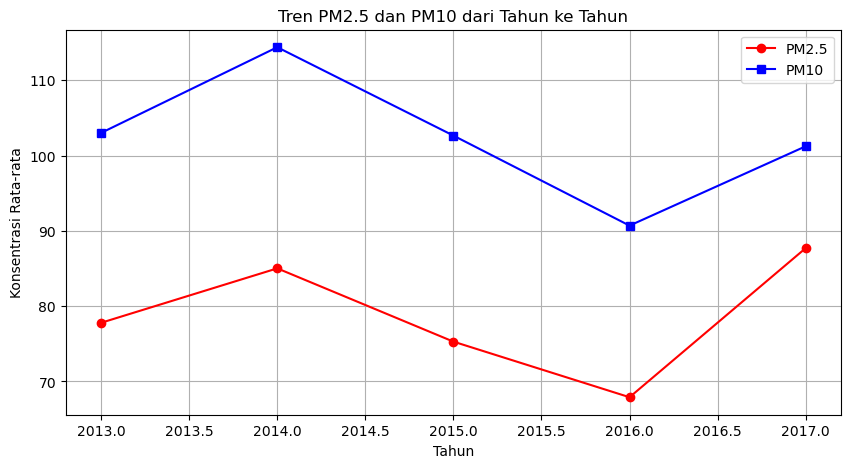

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(pm_trend.index, pm_trend["PM2.5"], marker="o", linestyle="-", label="PM2.5", color="red")
plt.plot(pm_trend.index, pm_trend["PM10"], marker="s", linestyle="-", label="PM10", color="blue")

plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Tren PM2.5 dan PM10 dari Tahun ke Tahun")
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:  Apakah terdapat tren penurunan atau peningkatan CO DAN NO2 dalam beberapa tahun terakhir pada station Aotizhongxin dan Changping?

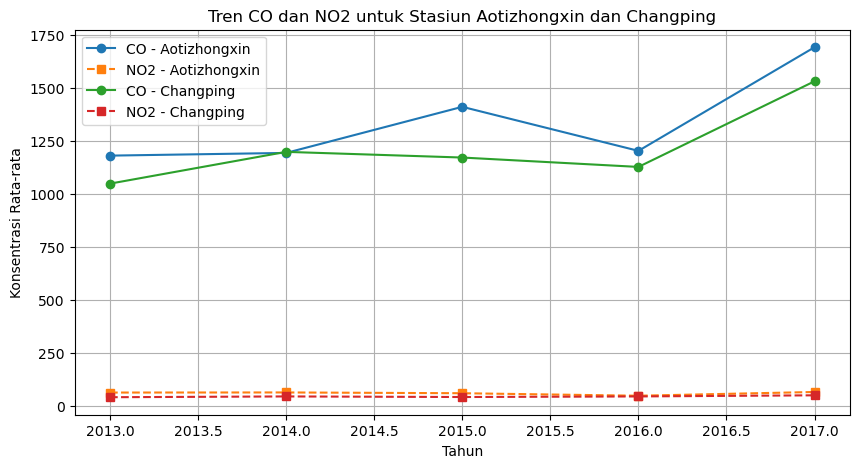

In [53]:
plt.figure(figsize=(10, 5))
for station in stations:
    subset = co_no2_trend[co_no2_trend["station"] == station]
    plt.plot(subset["year"], subset["CO"], marker="o", linestyle="-", label=f"CO - {station}")
    plt.plot(subset["year"], subset["NO2"], marker="s", linestyle="--", label=f"NO2 - {station}")

plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Tren CO dan NO2 untuk Stasiun Aotizhongxin dan Changping")
plt.legend()
plt.grid()
plt.show()

## Conclusion

- Kesimpulan pertanyaan 1: Konsentrasi PM2.5 dan PM10 meningkat dari 2013 hingga mencapai puncaknya pada 2014, lalu menurun hingga 2016, kemungkinan akibat perbaikan kualitas udara atau faktor lingkungan. Namun, pada 2017, terjadi peningkatan kembali, menunjukkan pola fluktuatif tanpa tren penurunan atau kenaikan yang konsisten. Hal ini mencerminkan ketidakstabilan kualitas udara dalam periode tersebut.
 
- Kesimpulan pertanyaan 2: Grafik tren CO dan NO2 di stasiun Aotizhongxin dan Changping menunjukkan pola fluktuatif. Konsentrasi CO meningkat dari 2013 hingga 2015, menurun pada 2016, lalu naik pada 2017, terutama di Aotizhongxin. NO2 di Aotizhongxin cenderung menurun hingga 2016 sebelum naik tajam pada 2017, sedangkan di Changping, NO2 meningkat pada 2013-2014, sedikit turun pada 2015-2016, dan kembali naik pada 2017. Secara keseluruhan, kualitas udara tidak mengalami perbaikan yang konsisten, dengan lonjakan polutan pada 2017 yang kemungkinan dipengaruhi faktor lingkungan atau aktivitas manusia.